# LOAN_PREDICTION

# NOTEBOOK_EDA📕
Prévision crédit Immobilier

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import seaborn as sns 
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn import set_config; set_config(display='diagram')
from sklearn.preprocessing import OneHotEncoder
# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score,precision_score,recall_score

# OPEN DATABASE

In [13]:
df_credit=pd.read_csv('csv/train.csv')


In [14]:
df_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Permet de voir toutes les lignes de mon dataset 
cela est optionel

In [16]:
pd.set_option('display.max_rows',df_credit.shape[0]+1)

In [17]:
df_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


# Affiche les 5 premières lignes

In [18]:
df_credit.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Cela nous permet d'avoir la taille de la base de donée

In [20]:
# 614 lignes et 13 Colonnes
df_credit.shape

(614, 13)

In [21]:
df_credit = df_credit.drop(['Loan_ID'], axis=1)
df_credit

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


# FEATURE ENGINEERING

# Visualisation des valeurs manquantes

In [25]:
df_credit.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [26]:
# On observe le type des colonnes 
# les types de colonne sont correct 
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [24]:
# j'ai cherche dans ma BDD les features ou il y a des valeurs manquantes en faisant la somme et les classer
df_credit.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#statistics of the data
df_credit.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [8]:
df_credit.shape

(614, 13)

In [10]:
df_credit.nunique()/len(df_credit)

Loan_ID              1.000000
Gender               0.003257
Married              0.003257
Dependents           0.006515
Education            0.003257
Self_Employed        0.003257
ApplicantIncome      0.822476
CoapplicantIncome    0.467427
LoanAmount           0.330619
Loan_Amount_Term     0.016287
Credit_History       0.003257
Property_Area        0.004886
Loan_Status          0.003257
dtype: float64

In [27]:
df_credit.Gender.value_counts()/len(df_credit.Gender)*100

Male      79.641694
Female    18.241042
Name: Gender, dtype: float64

<AxesSubplot: ylabel='Gender'>

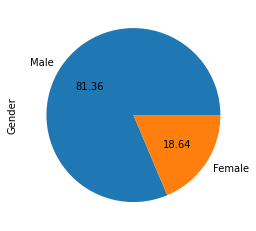

In [28]:
df_credit.Gender.value_counts().plot.pie(autopct='%.2f')

In [29]:
df_credit.Married.value_counts()/len(df_credit.Gender)*100

Yes    64.820847
No     34.690554
Name: Married, dtype: float64

<AxesSubplot: ylabel='Married'>

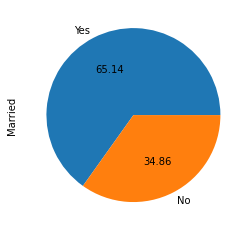

In [30]:
df_credit.Married.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot: ylabel='Education'>

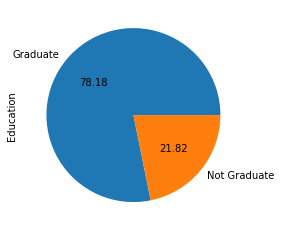

In [31]:
df_credit.Education.value_counts().plot.pie(autopct='%.2f')

In [33]:
df_credit.Dependents.value_counts()/len(df_credit.Gender)*100


0     56.188925
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64

<AxesSubplot: ylabel='Dependents'>

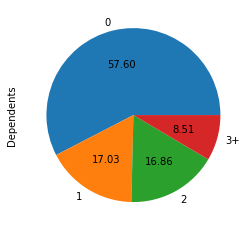

In [34]:
df_credit.Dependents.value_counts().plot.pie(autopct='%.2f')

In [35]:
df_credit.Self_Employed.value_counts()/len(df_credit.Gender)*100


No     81.433225
Yes    13.355049
Name: Self_Employed, dtype: float64

In [36]:
df_credit.Property_Area.value_counts()/len(df_credit.Gender)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

In [37]:
df_credit.duplicated().sum() 

0

In [38]:
# target
df_credit.Loan_Status.value_counts()/len(df_credit.Gender)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot: ylabel='Loan_Status'>

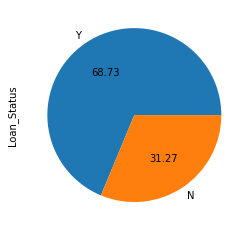

In [39]:
df_credit.Loan_Status.value_counts().plot.pie(autopct='%.2f')

In [40]:
df_credit.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [45]:
#data n'est pas balancées
# delate Loan_ID
# df_credit=df_credit.drop(['Loan_ID'],axis=1)

array([[<AxesSubplot: title={'center': 'ApplicantIncome'}>,
        <AxesSubplot: title={'center': 'CoapplicantIncome'}>],
       [<AxesSubplot: title={'center': 'LoanAmount'}>, <AxesSubplot: >]],
      dtype=object)

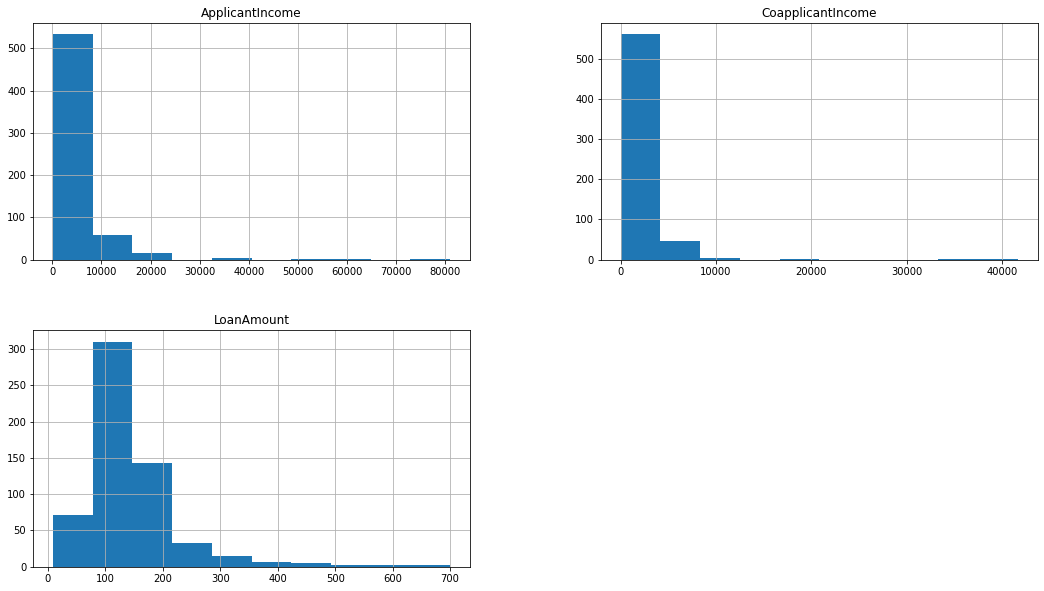

In [46]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
df_credit.hist(['ApplicantIncome', 'CoapplicantIncome','LoanAmount'], figsize=(18,10))

In [47]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

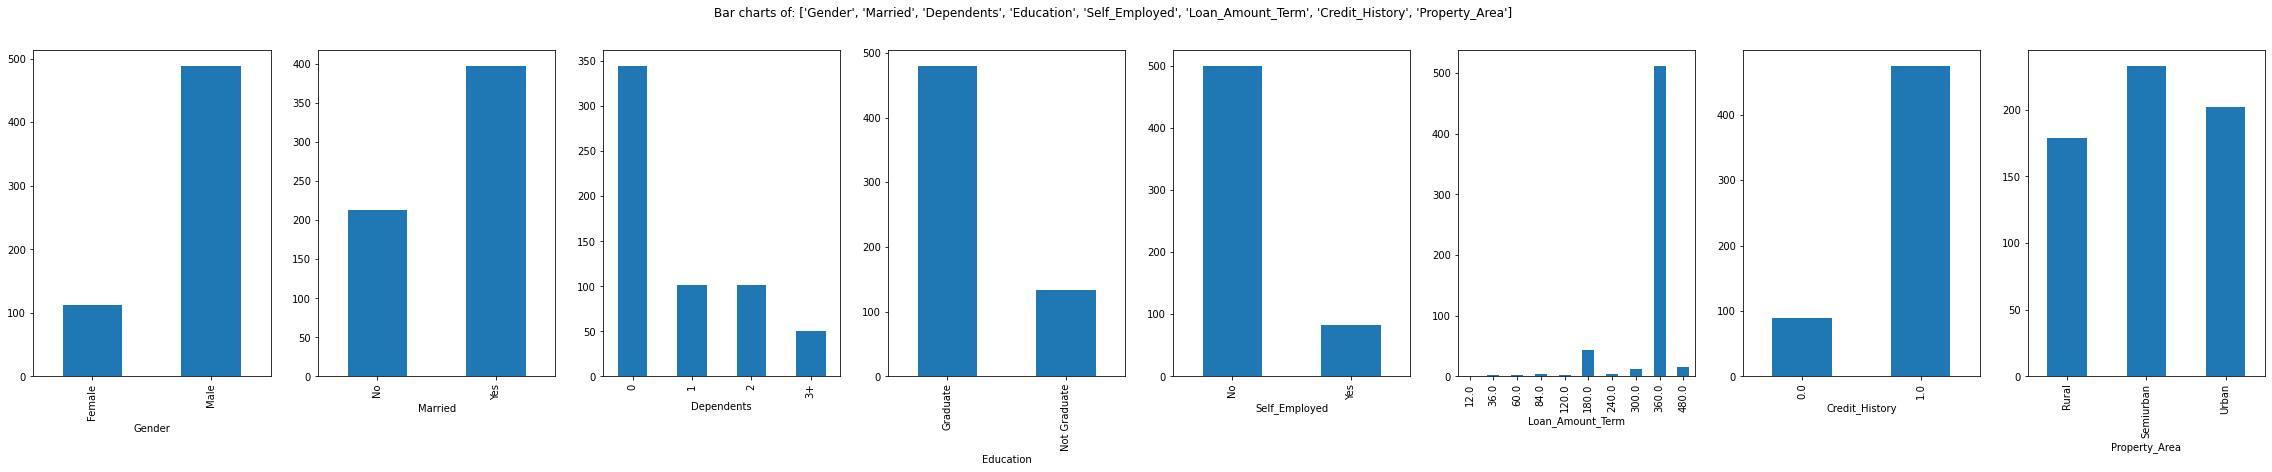

In [49]:
# Calling the function
PlotBarCharts(inpData=df_credit, colsToPlot=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'])

In [50]:
# Finding nearest values to 30000 mark
df_credit['ApplicantIncome'][df_credit['ApplicantIncome']>20000].sort_values()

130    20166
308    20233
284    20667
506    20833
126    23803
183    33846
443    37719
185    39147
155    39999
171    51763
333    63337
409    81000
Name: ApplicantIncome, dtype: int64

array([[<AxesSubplot: title={'center': 'ApplicantIncome'}>,
        <AxesSubplot: title={'center': 'CoapplicantIncome'}>]],
      dtype=object)

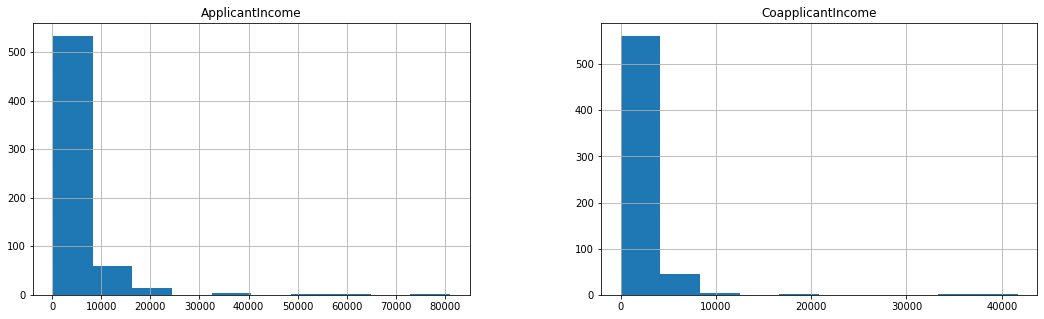

In [51]:
#Visualizing distribution after outlier treatment
df_credit.hist(['ApplicantIncome', 'CoapplicantIncome'], figsize=(18,5))

In [52]:
# j'ai cherche dans ma BDD les features ou il y a des valeurs manquantes en faisant la somme et les classer
df_credit.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
nb_de_valeurs_manquantes = df_credit.isnull().sum().sum()
nb_de_valeurs_manquantes

149

# Valeurs manquante en pourcentage 

In [55]:
nb_de_valeurs_manquantes/len(df_credit. index)*100

24.267100977198698

# Visualisation des Valeurs Statistique
variables numérique si elles sont anormales ou pas

In [56]:
# aucune valeurs négative
df_credit.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Visualisation des Valeurs Statistique
variables catégorique si elles sont anormales ou pas

In [57]:
# aucune valeurs catégotique anormale
df_credit.describe(include='O')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


# SEPARER LES VARIABLES CATEGORIQUE, DES VARIABLES NUMERIQUE

In [58]:
var_cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
var_num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
print('les variables catégoriques sont:',var_cat)
print('les variables numériques sont:',var_num)

les variables catégoriques sont: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
les variables numériques sont: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


# remplacer les valeurs manquantes coté variables catégoriques

In [59]:
df_credit['Gender'].fillna(df_credit['Gender'].mode()[0],inplace=True)
df_credit['Married'].fillna(df_credit['Married'].mode()[0],inplace=True)
df_credit['Dependents'].fillna(df_credit['Dependents'].mode()[0],inplace=True)
df_credit['Self_Employed'].fillna(df_credit['Self_Employed'].mode()[0],inplace=True)
df_credit['Credit_History'].fillna(df_credit['Credit_History'].mode()[0],inplace=True)

In [60]:
df_credit.shape

(614, 12)

# supprimer les valeurs manquantes coté variables numériques

In [62]:
df_credit['LoanAmount'].fillna(df_credit['LoanAmount'].median(),inplace=True)
df_credit['Loan_Amount_Term'].fillna(df_credit['Loan_Amount_Term'].median(),inplace=True)

In [63]:
df_credit.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# OUTLIER

In [64]:
import plotly.express as px

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


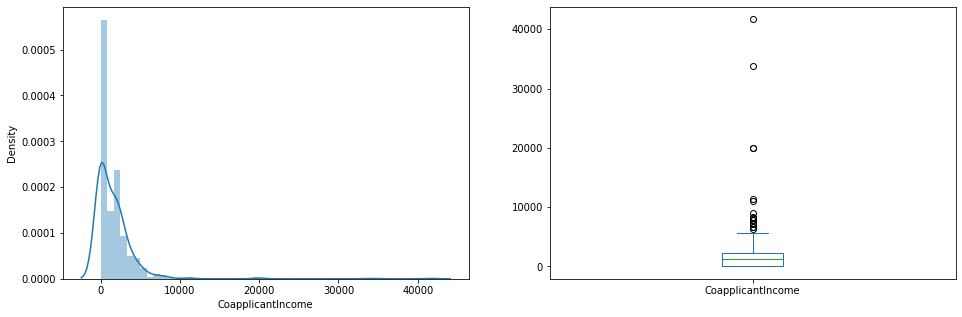

In [65]:
# applicantincome
plt.figure(1)

plt.subplot(121)
sns.distplot(df_credit['CoapplicantIncome'])

plt.subplot(122)
df_credit['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

In [66]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


<AxesSubplot: >

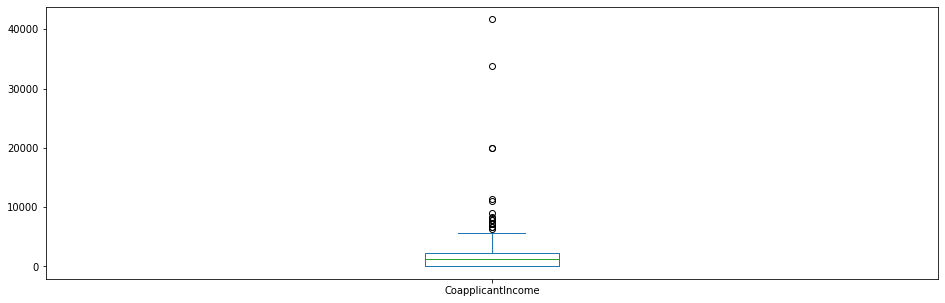

In [67]:
df_credit['CoapplicantIncome'].plot.box(figsize=(16,5))


<AxesSubplot: >

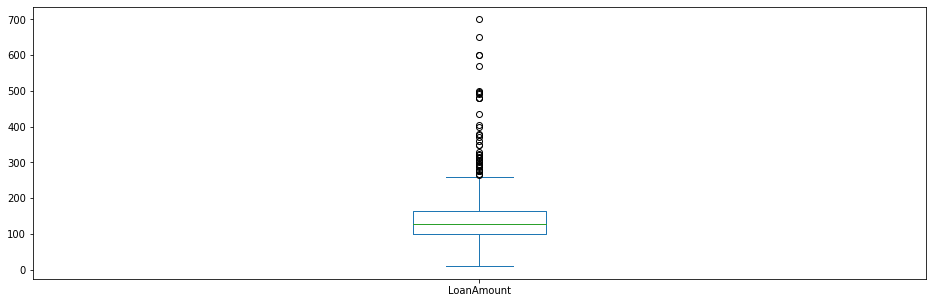

In [68]:
df_credit['LoanAmount'].plot.box(figsize=(16,5))


# Analyse bivariée et Relation entre les features et la target 

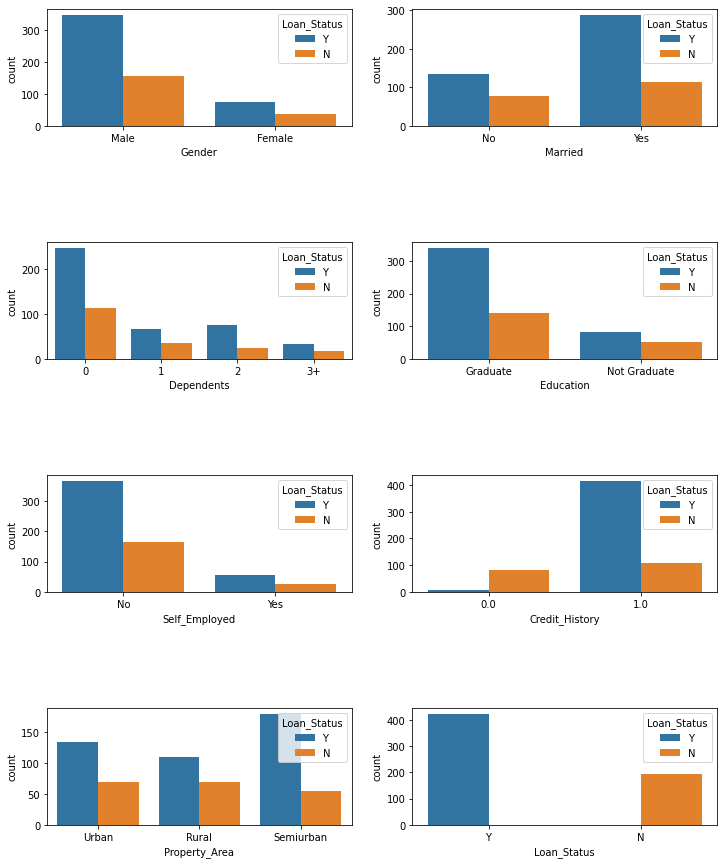

In [70]:
# les variables catégoriques
fig,axes=plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(var_cat):
  row,col=idx//2,idx%2
  sns.countplot(x=cat_col,data=df_credit,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

<AxesSubplot: >

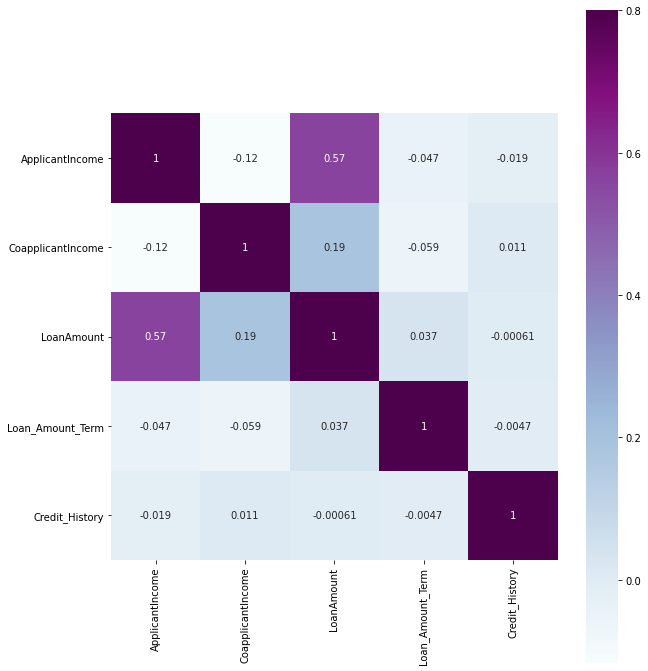

In [71]:
#correlation des variables numérique
matrix=df_credit.corr()
f,ax=plt.subplots(figsize=(10,12))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu',annot=True)

# Valeur statistique

In [72]:
df_credit[var_num].describe()
# il affiche plusieurs valeurs statistique

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


# Export Fichier csv

In [73]:
df_credit.to_csv("df_clean_train.csv")